In [2]:
#all the imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
#Importing the data to train on
data = pd.read_excel('Data_Train.xlsx')

In [4]:
#view basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
#View the head
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Data Pre-processing

Checking for missing values.

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

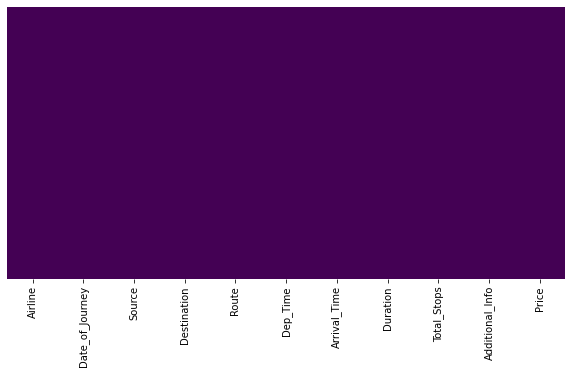

In [6]:
fig, ax = plt.subplots(figsize=(10,5))     
sb.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
data.isnull().sum()

Values missing are not much, so dropping the respective rows for the missing values.

In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
#converting datatype of time related colums from objects to datetime 

data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [11]:
data['Journey_day'] = data['Date_of_Journey'].dt.day
data['Journey_month'] = data['Date_of_Journey'].dt.month
data['Journey_day_week'] = data['Date_of_Journey'].dt.dayofweek


In [12]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_day_week
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-06-03 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,6
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-03 05:50:00,2021-06-03 13:15:00,7h 25m,2 stops,No info,7662,5,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-03 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,4
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-06-03 18:05:00,2021-06-03 23:30:00,5h 25m,1 stop,No info,6218,5,12,3
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-06-03 16:50:00,2021-06-03 21:35:00,4h 45m,1 stop,No info,13302,3,1,3


In [13]:
# After extracting info from 'Date_of_Journey' column, dropping i
data.drop('Date_of_Journey', axis=1, inplace=True)

In [14]:
# Functions to extract hours and min from A Column and create individual column for hour and minute.
def extract_hour(df,col):
    df[col+"_hour"]=df[col].dt.hour
    
def extract_min(df,col):
    df[col+"_minute"]=df[col].dt.minute

In [15]:
# For departure times
extract_hour(data,'Dep_Time')
extract_min(data,'Dep_Time')

In [16]:
data.drop('Dep_Time', axis=1, inplace=True)

In [17]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_day_week,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,6,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-03 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,4,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-06-03 23:30:00,5h 25m,1 stop,No info,6218,5,12,3,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-06-03 21:35:00,4h 45m,1 stop,No info,13302,3,1,3,16,50


In [18]:
# For arrival times
extract_hour(data,'Arrival_Time')
extract_min(data,'Arrival_Time')

In [19]:
data.drop('Arrival_Time', axis=1, inplace=True)

In [20]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_day_week,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,6,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,4,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,3,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,3,16,50,21,35


In [61]:
#Extract minutes and convert duration into minutes
import re
duration = list(data['Duration'])
li = []
for currentDuration in duration:
    temp = re.findall(r'\d+', currentDuration)
    res = list(map(int, temp))
    if( len(res) > 1):
        mins = res[0]*60 + res[1]
    elif('h' in currentDuration):
        mins = res[0]*60
    else:
        mins = res[0]
    li.append(mins)
data['durationMinutes'] = li

In [62]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_day_week,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,durationMinutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,6,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,4,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,3,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,3,16,50,21,35,285


In [ ]:
data.drop('Arrival_Time', axis=1, inplace=True)